In [3]:
# Clone the YOLO repository
!git clone https://github.com/ultralytics/yolov5.git

# Install required dependencies
!pip install -r /kaggle/working/yolov5/requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 18.93 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 23.6 MB/s eta 0:00:0000:01


In [5]:
import shutil

source_dir = "/kaggle/input/car-crash-dataset-russia-2022-2023/dataset/video"

destination_dir = "/kaggle/working/video"

shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)


'/kaggle/working/video'

In [12]:
import os
import json
import cv2
from pathlib import Path

def get_json_files(directory):
    return sorted(Path(directory).glob('*.json'))  # Get and sort JSON files

def extract_frames_count_from_json(json_path):
    try:
        with open(json_path, 'r') as json_file:
            data = json.load(json_file)
            # Navigate through the nested structure to get framesCount
            frames_count = data['root'][0]['box'][0]['framesCount']
            return frames_count
    except (FileNotFoundError, KeyError, IndexError) as e:
        print(f"Error reading {json_path}: {e}")
        return None

def collect_frames_counts(directory):
    frames_counts = {}
    json_files = get_json_files(directory)

    for json_file in json_files:
        frames_count = extract_frames_count_from_json(json_file)
        if frames_count is not None:
            # Use the filename without extension as the key
            key = json_file.stem
            frames_counts[key] = frames_count

    return frames_counts

def get_video_files(directory):
    return sorted(Path(directory).glob('*.mp4'))  # Adjust the extension if needed

def split_video_to_frames(video_path, output_folder, num_frames):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Open video file
    video_capture = cv2.VideoCapture(str(video_path))
    
    # Get the total number of frames in the video
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate interval for frames to be captured
    interval = max(total_frames // num_frames, 1)
    
    # Extract frames
    frames_captured = 0
    frame_number = 0
    while frames_captured < num_frames:
        # Set the video position to the correct frame
        video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        
        # Read the frame
        ret, frame = video_capture.read()
        
        # Check if frame reading was successful
        if not ret:
            break
        
        # Save frame as an image file
        output_path = os.path.join("/kaggle/working/hello/validate/images", f"{video_path.stem}_frame_{frames_captured + 1:04d}.jpg")
        cv2.imwrite(output_path, frame)
        
        frames_captured += 1
        frame_number += interval
    
    # Release the video capture object
    video_capture.release()
    print(f"Extracted {frames_captured} frames from {video_path.name} to {output_path}")

def process_videos_with_json(directory):
    # Step 1: Collect frames counts from JSON files
    frames_counts = collect_frames_counts(directory)
    
    # Step 2: Process video files
    video_directory = directory  # Assuming videos are in the same directory
    video_files = get_video_files(video_directory)

    for video_file in video_files:
        # Get the corresponding framesCount from the dictionary
        key = video_file.stem
        if key in frames_counts_dict.keys():
            num_frames = frames_counts_dict[key]
            output_folder = os.path.join(video_directory, f"{key}_frames")  # Create a folder for frames of each video
            split_video_to_frames(video_file, output_folder, num_frames)

# Example usage
directory_path = "/kaggle/working/video"  # Replace with your directory path containing videos and JSONs
process_videos_with_json(directory_path)


Extracted 108 frames from w10_10.mp4 to /kaggle/working/hello/validate/images/w10_10_frame_0108.jpg
Extracted 71 frames from w10_100.mp4 to /kaggle/working/hello/validate/images/w10_100_frame_0071.jpg


KeyboardInterrupt: 

In [10]:
import os

def create_directory(directory):
    try:
        # Create the directory
        os.makedirs(directory, exist_ok=True)  # exist_ok=True prevents an error if the directory already exists
        print(f"Directory '{directory}' created successfully.")
    except Exception as e:
        print(f"An error occurred while creating the directory: {e}")


create_directory("/kaggle/working/hello/validate/images")


Directory '/kaggle/working/hello/validate/images' created successfully.


In [79]:
import os

def count_files_in_directory(directory):
    # List all files and directories in the specified directory
    entries = os.listdir(directory)
    
    # Filter out the entries that are files
    files = [entry for entry in entries if os.path.isfile(os.path.join(directory, entry))]
    
    return len(files)

# Example usage
directory_path = "/kaggle/working/validate/"  # Replace with your directory path
num_files = count_files_in_directory(directory_path)
print(f"Number of files in '{directory_path}': {num_files}")


Number of files in '/kaggle/working/validate/': 234


In [6]:
import os
import json
from pathlib import Path

def get_json_files(directory):
    return sorted(Path(directory).glob('*.json'))  # Get and sort JSON files

def extract_frames_count_from_json(json_path):
    try:
        with open(json_path, 'r') as json_file:
            data = json.load(json_file)
            # Navigate through the nested structure to get framesCount
            frames_count = data[0]['box'][0]['framesCount']
            return frames_count
    except (FileNotFoundError, KeyError, IndexError) as e:
        print(f"Error reading {json_path}: {e}")
        return None

def collect_frames_counts(directory):
    frames_counts = {}
    json_files = get_json_files(directory)

    for json_file in json_files:
        frames_count = extract_frames_count_from_json(json_file)
        if frames_count is not None:
            # Use the filename without extension as the key
            key = json_file.stem
            frames_counts[key] = frames_count

    return frames_counts

# Example usage
json_directory_path = "/kaggle/input/car-crash-dataset-russia-2022-2023/dataset/label/json"  # Replace with your JSON directory path
frames_counts_dict = collect_frames_counts(json_directory_path)

print("Collected framesCount values:", frames_counts_dict)


Collected framesCount values: {'w10_10': 108, 'w10_100': 71, 'w10_101': 67, 'w10_102': 113, 'w10_103': 92, 'w10_104': 67, 'w10_105': 89, 'w10_106': 61, 'w10_107': 83, 'w10_108': 67, 'w10_109': 98, 'w10_11': 139, 'w10_110': 61, 'w10_111': 69, 'w10_112': 63, 'w10_113': 45, 'w10_114': 69, 'w10_115': 53, 'w10_116': 35, 'w10_117': 155, 'w10_118': 48, 'w10_119': 67, 'w10_12': 61, 'w10_120': 91, 'w10_121': 69, 'w10_122': 74, 'w10_123': 65, 'w10_124': 45, 'w10_125': 39, 'w10_126': 101, 'w10_127': 39, 'w10_128': 38, 'w10_129': 90, 'w10_13': 60, 'w10_130': 68, 'w10_131': 75, 'w10_132': 208, 'w10_133': 312, 'w10_134': 227, 'w10_135': 132, 'w10_136': 158, 'w10_137': 213, 'w10_138': 121, 'w10_139': 175, 'w10_14': 111, 'w10_140': 93, 'w10_141': 146, 'w10_142': 88, 'w10_143': 56, 'w10_144': 107, 'w10_145': 208, 'w10_146': 156, 'w10_147': 155, 'w10_148': 39, 'w10_149': 48, 'w10_15': 70, 'w10_150': 63, 'w10_151': 40, 'w10_152': 52, 'w10_153': 49, 'w10_154': 59, 'w10_155': 46, 'w10_156': 46, 'w10_157': 

In [5]:
!pip install ultralytics


In [14]:
import os
import json

def create_yolo_txt(json_folder, output_folder, img_width=640, img_height=480):
    # Ensure the output directory exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over all JSON files in the specified folder
    for json_filename in os.listdir(json_folder):
        if json_filename.endswith('.json'):
            json_path = os.path.join(json_folder, json_filename)

            # Load the JSON data
            with open(json_path, 'r') as f:
                data = json.load(f)

            # Extract the sequence from the box
            sequences = data[0].get('box', [])
            for box in sequences:
                frames = box.get('sequence', [])
                for frame in frames:
                    frame_id = frame.get('frame', -1)
                    x = frame.get('x', 0)
                    y = frame.get('y', 0)
                    width = frame.get('width', 0)
                    height = frame.get('height', 0)
                    
                    # Create a TXT file for each frame
                    txt_filename = f"{os.path.splitext(json_filename)[0]}_frame_{frame_id}.txt"
                    txt_path = os.path.join(output_folder, txt_filename)
                    
                    # Normalize the bounding box coordinates to [0, 1]
                    x_center = x + (width / 2)
                    y_center = y + (height / 2)
                    
                    # Normalize the center coordinates and dimensions
                    x_center /= img_width
                    y_center /= img_height
                    width /= img_width
                    height /= img_height

                    # Write to the TXT file in YOLO format (class_id 0 assumed here)
                    with open(txt_path, 'w') as txt_file:
                        txt_file.write(f"0 {x_center} {y_center} {width} {height}\n")
                
            print(f"Processed {txt_filename}")

# Usage
json_folder = '/kaggle/input/car-crash-dataset-russia-2022-2023/dataset/label/json'  # Replace with your JSON files folder
output_folder = '/kaggle/working/hello/validate/labels/'  # Replace with your desired output folder
create_yolo_txt(json_folder, output_folder)


Processed w3_28_frame_46.txt
Processed w2_47_frame_120.txt
Processed w10_36_frame_96.txt
Processed w6_81_frame_102.txt
Processed w5_8_frame_109.txt
Processed w6_52_frame_100.txt
Processed w2_83_frame_200.txt
Processed w2_28_frame_104.txt
Processed w2_52_frame_176.txt
Processed w6_44_frame_208.txt
Processed w6_71_frame_201.txt
Processed w10_97_frame_61.txt
Processed w2_55_frame_134.txt
Processed w6_97_frame_66.txt
Processed w2_60_frame_403.txt
Processed w7_9_frame_196.txt
Processed w3_39_frame_53.txt
Processed w10_52_frame_96.txt
Processed w10_62_frame_76.txt
Processed w10_13_frame_60.txt
Processed w10_101_frame_50.txt
Processed w7_17_frame_122.txt
Processed w10_141_frame_107.txt
Processed w1_31_frame_94.txt
Processed w2_9_frame_128.txt
Processed w6_22_frame_113.txt
Processed w6_5_frame_78.txt
Processed w5_49_frame_86.txt
Processed w2_95_frame_234.txt
Processed w2_89_frame_125.txt
Processed w3_24_frame_68.txt
Processed w6_35_frame_333.txt
Processed w10_85_frame_129.txt
Processed w5_17_f

KeyboardInterrupt: 

In [15]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/kaggle/working/hello/train',
    val = '/kaggle/working/hello/validate',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [16]:
import wandb

try:
    
    wandb.login(key='1a7158562f4e89adb744a65c610197888f19516b')
    anony = None
except:
    anony = "must"
    print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')


wandb: Currently logged in as: yazan-nukari (yazan-nukari-innopolis-university). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [17]:
!python /kaggle/working/yolov5/train.py --img 416 --batch 16 --epochs 50 --data /kaggle/working/data.yaml --weights yolov5n.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: yazan-nukari (yazan-nukari-innopolis-university). Use `wandb login --relogin` to force relogin
train: weights=yolov5n.pt, cfg=, data=/kaggle/working/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SG

# !wandb disabled
!python /kaggle/working/yolov5/train.py --img 416 --batch 16 --epochs 50 --data /kaggle/working/data.yaml --weights yolov5n.pt


### !wandb disabled
!python /kaggle/working/yolov5/train.py --img 416 --batch 16 --epochs 50 --data /kaggle/working/data.yaml --weights yolov5n.pt


In [97]:
!python /kaggle/working/yolov5/detect.py --source /kaggle/working/validate/w10_10_frame_0108.jpg

detect: weights=yolov5/yolov5s.pt, source=/kaggle/working/validate/w10_10_frame_0108.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.14 torch-2.4.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /kaggle/working/validate/w10_10_frame_0108.jpg: 384x640 5 cars, 3 traffic lights, 283.8ms
Speed: 5.2ms pre-process, 283.8ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp2


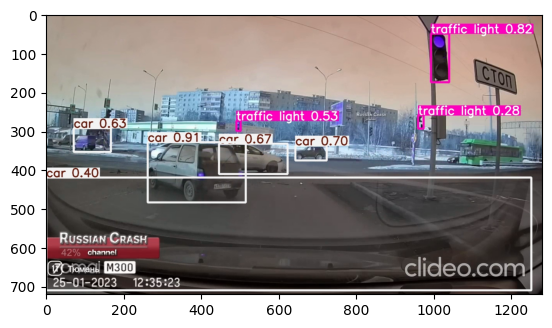

In [93]:
import matplotlib.pyplot as plt

img = cv2.imread("yolov5/runs/detect/exp/w10_10_frame_0108.jpg")
plt.imshow(img)

In [6]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov8s.pt')  # or specify a path to a custom model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 48.2MB/s]


In [ ]:

# Train the model
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16, name='yolov8_custom')
